In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Load data

We'll use `web.DataReader()` to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
start = datetime(2015,6,1)
end = datetime(2018,6,22)
df = web.DataReader('AAPL', 'morningstar', start, end)

# Set the date to be the index

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the date column to be the index.

In [4]:
df.reset_index(inplace=True)

In [5]:
df.shape[0]

800

In [6]:
len(df['Date'].unique())

800

In [7]:
df.set_index('Date', inplace=True)

In [9]:
df.drop('Symbol', axis=1, inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


# Explore the data

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [16]:
df.describe()

,Close,High,Low,Open,Volume
count,800.000000,800.000000,800.000000,800.000000,8.000000e+02
mean,133.209913,134.201524,132.137207,133.162036,3.503279e+07
std,28.615227,28.739469,28.493054,28.622698,1.896129e+07
min,90.340000,91.670000,89.470000,90.000000,0.000000e+00
25%,109.545000,110.487500,108.600000,109.600000,2.367132e+07
50%,123.940000,125.070000,122.545000,124.165000,3.126008e+07
75%,157.485000,159.755000,156.475025,157.982500,4.234878e+07
max,193.980000,194.200000,192.360000,194.140000,1.622063e+08


# Filtering by dates

Now that our Date column is the index, we can filter our data in unique ways. Try `df['2016']` in the cell below:

In [11]:
df['2016'].head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-01,105.26,105.260,105.26,105.26,0
2016-01-04,105.35,105.368,102.00,102.61,67649387
2016-01-05,102.71,105.850,102.41,105.75,55790992
2016-01-06,100.70,102.370,99.87,100.56,68457388
2016-01-07,96.45,100.130,96.43,98.68,81094428


You can also filter by month:

In [12]:
df['2016-06'].head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-06-01,98.46,99.54,98.33,99.02,29173285
2016-06-02,97.72,97.84,96.63,97.60,40191600
2016-06-03,97.92,98.27,97.45,97.79,28504888
2016-06-06,98.63,101.89,97.55,97.99,23292504
2016-06-07,99.03,99.87,98.96,99.25,22409450


In [18]:
# All Junes
df[df.index.month == 6].head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


# Resampling

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [19]:
# 'A' for annual
df.resample('A').mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-12-31,117.507045,118.686145,116.352916,117.612143,4.894606e+07
2016-12-31,104.574636,105.369310,103.692350,104.481648,3.711183e+07
2017-12-31,150.427212,151.252567,149.400524,150.331663,2.619797e+07
2018-12-31,176.534320,178.051964,175.068617,176.491332,3.192704e+07


In [20]:
# 'M' for monthly
df.resample('M').mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-30,127.806364,128.761136,127.240645,128.055227,3.993667e+07
2015-07-31,125.383478,126.213800,124.431304,125.493478,4.601220e+07
2015-08-31,113.394762,115.500000,111.290476,113.439286,7.653749e+07
2015-09-30,112.637273,113.982841,111.421186,112.837727,5.484306e+07
2015-10-31,113.360000,114.132336,111.875227,112.924545,5.062290e+07
2015-11-30,118.155952,119.212857,117.293381,118.164762,3.574479e+07
2015-12-31,111.566087,112.804348,110.624030,112.097826,4.011419e+07
2016-01-31,98.692381,100.067933,97.334757,98.943333,6.056419e+07
2016-02-29,95.662857,96.597314,94.677190,95.614762,3.861250e+07


# Lookup challenge

Where can you find all the resample options?

https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

# "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

In [21]:
df.rolling(2).mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,130.2475,131.0225,129.6850,130.5300,32890212.0
2015-06-03,130.0400,130.7975,129.6100,130.2600,32325584.5
2015-06-04,129.7400,130.7600,129.4050,130.1200,34716830.0
2015-06-05,129.0050,130.1350,128.6350,129.5400,37038459.0
2015-06-08,128.2250,129.4500,127.5950,129.2000,44150793.0
2015-06-09,127.6100,128.6450,126.2250,127.8000,54375103.0
2015-06-10,128.1500,128.7100,126.7350,127.3100,47581335.0
2015-06-11,128.7350,129.7600,128.1625,128.5500,37239068.5


# Challenge

Concatenate the `Close` column with the 3 day rolling mean of the `Close` column.

In [23]:
pd.concat([df[['Close']].rolling(3).mean(), df[['Close']]], axis=1)

,Close,Close
Date,,
2015-06-01,NaN,130.535
2015-06-02,NaN,129.960
2015-06-03,130.205000,130.120
2015-06-04,129.813333,129.360
2015-06-05,129.376667,128.650
2015-06-08,128.603333,127.800
2015-06-09,127.956667,127.420
2015-06-10,128.033333,128.880
2015-06-11,128.296667,128.590


# Challenge

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

In [24]:
import seaborn as sns

No handles with labels found to put in legend.


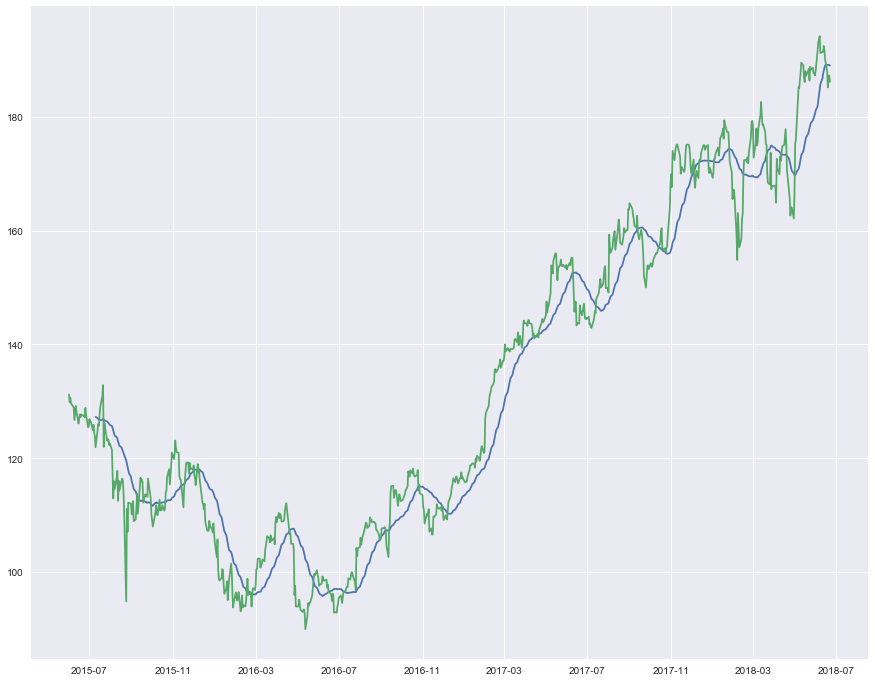

In [31]:
plt.figure(figsize=(15, 12))
plt.plot(pd.concat([df[['Open']].rolling(30).mean(), df[['Open']]], axis=1))

# The Expanding Mean
---

The "expanding mean" simply uses all data points up to the current time to calculate the mean, as opposed to a moving window.

In [33]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


In [32]:
df.expanding().mean().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.53500,131.39000,130.050000,131.200000,3.211280e+07
2015-06-02,130.24750,131.02250,129.685000,130.530000,3.289021e+07
2015-06-03,130.20500,130.99500,129.756667,130.573333,3.225466e+07
2015-06-04,129.99375,130.89125,129.545000,130.325000,3.380352e+07
2015-06-05,129.72500,130.65100,129.308000,130.160000,3.416818e+07


# Exponentially Weighted Windows
---

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time, $t$, is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows) for more information.

In [34]:
df.ewm(span=10).mean()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535000,131.390000,130.050000,131.200000,3.211280e+07
2015-06-02,130.218750,130.985750,129.648500,130.463000,3.296795e+07
2015-06-03,130.179053,130.967359,129.749601,130.542193,3.217023e+07
2015-06-04,129.909212,130.839741,129.472990,130.225193,3.423918e+07
2015-06-05,129.547726,130.509682,129.153481,130.017010,3.463752e+07
2015-06-08,129.093781,130.172110,128.549993,129.726884,3.932242e+07
2015-06-09,128.690467,129.667995,127.843982,128.997526,4.335922e+07
2015-06-10,128.733587,129.593375,127.845351,128.752384,4.238733e+07
2015-06-11,128.702347,129.721004,127.982341,128.845418,4.086515e+07


# Using `.diff()` to calculate changes in values from day to day

In [35]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


In [37]:
df.diff().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,-0.575,-0.735,-0.73,-1.34,1554830.0
2015-06-03,0.160,0.285,0.58,0.80,-2684085.0
2015-06-04,-0.760,-0.360,-0.99,-1.08,7466576.0
2015-06-05,-0.710,-0.890,-0.55,-0.08,-2823318.0


# Using `df.pct_change()` to calculate percent changes from day to day

In [38]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


In [39]:
df.pct_change().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,-0.004405,-0.005594,-0.005613,-0.010213,0.048418
2015-06-03,0.001231,0.002181,0.004485,0.006160,-0.079723
2015-06-04,-0.005841,-0.002749,-0.007621,-0.008266,0.240985
2015-06-05,-0.005489,-0.006816,-0.004267,-0.000617,-0.073428


In [40]:
pd.concat([df[['Close']].diff().rename(columns={'Close': 'Diff'}), df[['Close']]], axis=1)

,Diff,Close
Date,,
2015-06-01,NaN,130.535
2015-06-02,-0.575,129.960
2015-06-03,0.160,130.120
2015-06-04,-0.760,129.360
2015-06-05,-0.710,128.650
2015-06-08,-0.850,127.800
2015-06-09,-0.380,127.420
2015-06-10,1.460,128.880
2015-06-11,-0.290,128.590


# Challenge

Create three **separate** plots:
1. One for the Close price
2. One for the Close price, using `.diff()`
3. One for the Close price as a percent change.

What happens to your overall data when you diff? Is this good or bad?

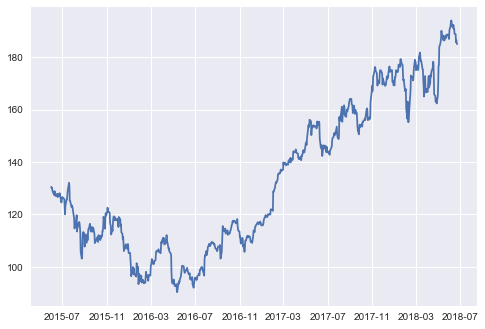

In [42]:
plt.plot(df["Close"]);

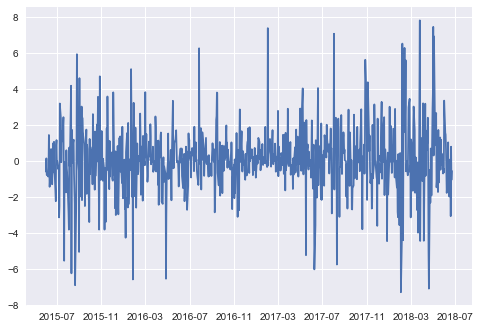

In [46]:
plt.plot(df["Close"].diff());

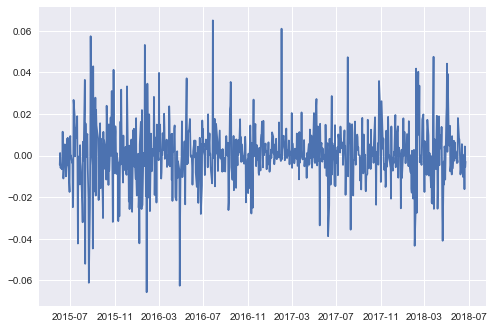

In [44]:
plt.plot(df["Close"].pct_change());

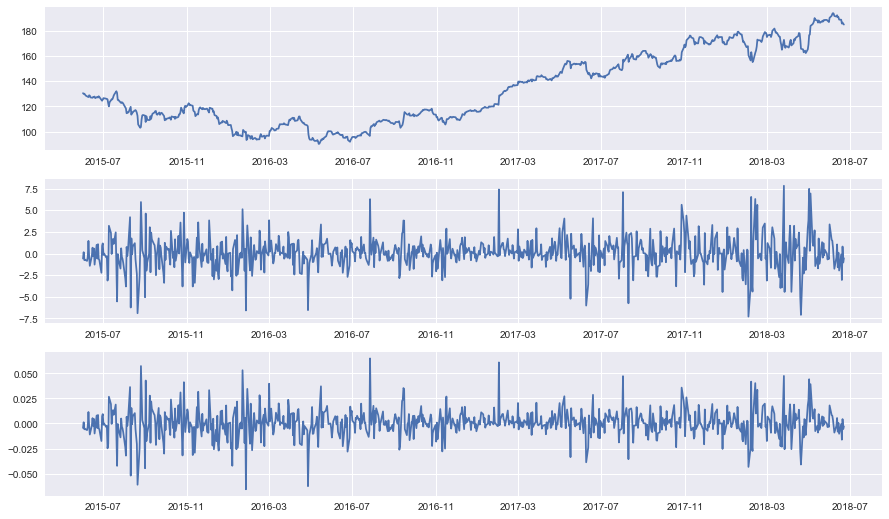

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 9))
axes[0].plot(df['Close'])
axes[1].plot(df['Close'].diff())
axes[2].plot(df['Close'].pct_change());

# Shifting

`df.shift()` is used to bring values from previous dates forward in time.

In [49]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,129.960,130.655,129.32,129.86,33667627
2015-06-03,130.120,130.940,129.90,130.66,30983542
2015-06-04,129.360,130.580,128.91,129.58,38450118
2015-06-05,128.650,129.690,128.36,129.50,35626800


In [50]:
df.shift().head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN
2015-06-02,130.535,131.390,130.05,131.20,32112797.0
2015-06-03,129.960,130.655,129.32,129.86,33667627.0
2015-06-04,130.120,130.940,129.90,130.66,30983542.0
2015-06-05,129.360,130.580,128.91,129.58,38450118.0


# Creating a simple dataset

Let's create a simple dataset that tries to predict today's Close price using yesterday's Close price with today's Open. 

In [57]:
close1 = df[['Close']].shift().rename(columns={'Close':'Close-1'})
train = pd.concat([close1, df[['Open', 'Close']]], axis=1)

In [58]:
train.dropna(inplace=True)

In [59]:
X = train[['Close-1', 'Open']]
y = train['Close']

Use `cross_val_score` to see how a `RandomForestRegressor`

In [60]:
rf = RandomForestRegressor()

In [61]:
cross_val_score(rf, X, y)

array([ 0.97066522,  0.98459223, -0.96399446])

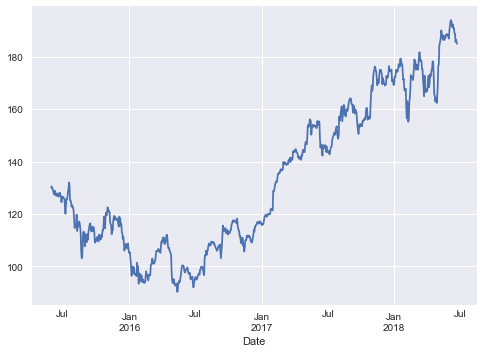

In [62]:
df['Close'].plot();

Let's evaluate what is going on. Use cross_val_predict to create a `Pred` column on `train`.

In [63]:
train['Pred'] = cross_val_predict(rf, X, y)

In [64]:
train['Day Percent Change'] = (train['Close'] - train['Open']) / train['Open']

In [65]:
train.head()

,Close-1,Open,Close,Pred,Day Percent Change
Date,,,,,
2015-06-02,130.535,129.86,129.96,131.209,0.000770
2015-06-03,129.960,130.66,130.12,131.514,-0.004133
2015-06-04,130.120,129.58,129.36,130.713,-0.001698
2015-06-05,129.360,129.50,128.65,130.048,-0.006564
2015-06-08,128.650,128.90,127.80,129.685,-0.008534


In [66]:
(train['Day Percent Change'] > 0).astype(int)

Date
2015-06-02    1
2015-06-03    0
2015-06-04    0
2015-06-05    0
2015-06-08    0
2015-06-09    1
2015-06-10    1
2015-06-11    0
2015-06-12    0
2015-06-15    1
2015-06-16    1
2015-06-17    0
2015-06-18    1
2015-06-19    0
2015-06-22    1
2015-06-23    0
2015-06-24    1
2015-06-25    0
2015-06-26    0
2015-06-29    0
2015-06-30    0
2015-07-01    0
2015-07-02    1
2015-07-03    0
2015-07-06    1
2015-07-07    0
2015-07-08    0
2015-07-09    0
2015-07-10    1
2015-07-13    1
             ..
2018-05-14    0
2018-05-15    0
2018-05-16    1
2018-05-17    0
2018-05-18    0
2018-05-21    0
2018-05-22    0
2018-05-23    1
2018-05-24    0
2018-05-25    1
2018-05-28    0
2018-05-29    1
2018-05-30    0
2018-05-31    0
2018-06-01    1
2018-06-04    1
2018-06-05    1
2018-06-06    1
2018-06-07    0
2018-06-08    1
2018-06-11    0
2018-06-12    1
2018-06-13    0
2018-06-14    0
2018-06-15    0
2018-06-18    1
2018-06-19    1
2018-06-20    1
2018-06-21    0
2018-06-22    0
Freq: B, Name: Day 